In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch

In [2]:
import pandas as pd
import os


In [17]:
data = pd.read_csv("data.csv",delimiter=",")
#print(data)
label=data.keys()

In [44]:
data[label[-1]]

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

In [45]:
# X=np.zeros((500,4094))
# cnt=0
# n=0
# for i in range(1,len(data[label[:-1]])):
#     if(cnt<23):
#         X[n,178*cnt:178*(cnt+1)]=np.array(data[label[1:-1]])[i]
#     else:
#         cnt=0
#     if(n<499):
#         n+=1
#     else:
#         n=0
X=np.array(data[label[1:-1]])
Y=np.zeros((len(data[label[:-1]]),1))
for i in range(1,len(data[label[:-1]])):
    if(np.array(data[label[-1]])[i]>1):
        Y[i]=0
    else:
        Y[i]=1

In [46]:
print(np.shape(X), np.shape(Y))
# plt.plot(X[:,0])
# 11500/500
# 4097/23
# len(data[label[:-1]])/23

(11500, 178) (11500, 1)


In [47]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

In [48]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(np.shape(X_test))

(3450, 178)


In [49]:
hidden_size = 20
net = torch.nn.Sequential(
                torch.nn.Linear(64, hidden_size),
                torch.nn.ReLU(),
                torch.nn.Linear(hidden_size, 10)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) #lr: learning rate

In [52]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 10, kernel_size=8, stride=1),
    torch.nn.MaxPool1d(kernel_size=3),
    torch.nn.Conv1d(10, 1, kernel_size=2, stride=1),
    torch.nn.Linear(18, 10)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2) #lr: learning rate
epochs = 60
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)

for epoch in range(epochs):
    X_new = np.expand_dims(X_train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(X_new).float())
    #print(np.shape(inputs))
    targets = torch.autograd.Variable(torch.Tensor(Y_train).long()) 
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1) # necesario para quitar la dimension intermedia de channel
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(Y_train, Y_predicted, average='macro')
    
    X_new = np.expand_dims(X_test, 1)
    inputs_test = torch.autograd.Variable(torch.Tensor(X_new).float())
    out_test = model(inputs_test)
    out_test = out_test.squeeze(dim=1)
    values, Y_predicted_test = torch.max(out_test.data, 1)
    F1_values_test[epoch] = sklearn.metrics.f1_score(Y_test, Y_predicted_test, average='macro')

RuntimeError: size mismatch, m1: [8050 x 56], m2: [18 x 10] at /opt/conda/conda-bld/pytorch_1587428266983/work/aten/src/TH/generic/THTensorMath.cpp:41

Text(0, 0.5, 'loss')

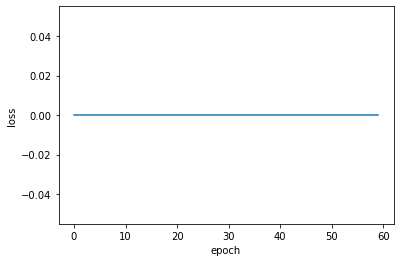

In [53]:
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

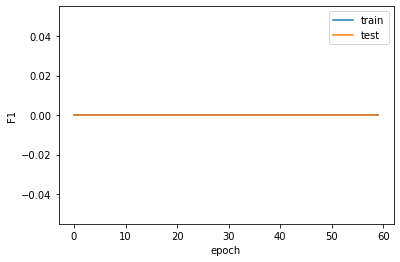

In [54]:
plt.plot(np.arange(epochs), F1_values_train, label='train')
plt.plot(np.arange(epochs), F1_values_test, label='test')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()